# RNN (Recurrent Neural Network, 순환신경망 )
- 순환데이터, 순환신경망 
- 텍스트 데이터(ex: I am a boy) : 순서가 의미가 있다. 
- 시계열 데이터(ex: 1일 10도, 2일 8도)
- cell, timestep 


## IMDB 데이터로 RNN 수행 
- IMDB(Internet Movie Data Base)
- 구성 : train data(25000개 중 긍정 12500개, 부정 12500) / test data(25000개 중 긍정 12500, 부정 12500) <br><br>
***<용어>*** 
- NLP : Natural Language Processing(자연어 처리)
- 말뭉치 : 하나의 데이터셋
- 토큰(token) : 하나의 단어
- 어휘사전 : 번호로 구분된 유힐한 단어들의 집단 
- 머신러닝,딥러닝 에서는 데이터가 숫자로 구성되어 있어야 함으로 단어에 고유 번호를 할당해 사용 


In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 500개 단어만 불러 쓴다 

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
# train의 첫번째 문장의 Token 갯수
len(train_input[0])

218

In [5]:
# train의 두번째 문장 token 갯수 
len(train_input[1])

189

In [6]:
# 첫번째 댓글 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


> 샘플의 시작 부분 토큰은 1을 사용 한다.     
> 자주 보이는 2는 선정한 단어 갯수에 포함되지 않는 단어를 표현한다. (우리가 500개를 달라고 했는데, 거기에 해당안되는 단어를 2로 표현함)   
> train_input 자체는 numpy 배열이나, 댓글에 사용된 토큰 수(문장 길이가 다름)가 다르기 때문에 numpy 배열을 사용할 수 없고 python list를 사용한다. 

In [7]:
# train의 target 출력
print(train_target[:10]) # 1은 좋아요 0은 나빠요

[1 0 0 1 0 0 1 0 1 0]


In [3]:
# train data / val data split 
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [9]:
# 각 리뷰의 문장 길이 평균, 중앙값
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


> 평균값이 더 높음. (오른쪽으로 치우친 모양, 특히 더 긴 리뷰들이 있었구나)      
> 중앙값은 항상 중간에 있는 값인데 평균이 더 오른쪽(높다)이라는 건 길이 긴게 더 많았다는 것!  

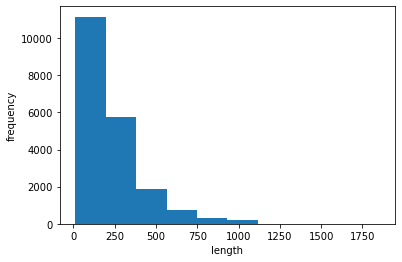

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

---
### Sequencial Padding
- 전체 자릿수를 100으로 가정했을 경우 한문장에 3개 토큰만 있을 경우 나머지 97개는 비워지고 이를 0으로 채우는 과정

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) # 위의 차트에서 100개 부분이 제일 많은 것 같아 100개의 토큰만 사용
val_seq = pad_sequences(val_input, maxlen= 100)

In [12]:
# 크기 확인
print(train_seq.shape)

(20000, 100)


> 25000개의 훈련세트 중 500개는 검증세트로 빠짐

In [13]:
# 첫번째 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
# 원본의 첫번째 댓글의 마지막 10개만 출력
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


> 뒤에 토큰이 다 있는것으로 보아 긴문장이었기 때문에 앞부분 짤림 

In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


---
# 순환 신경망 모델 만들기

In [5]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100, 500))) # 500 : One Hot Encoding  숫자가 의미가 없으면 무적권
model.add(keras.layers.Dense(1,activation = 'sigmoid'))


2022-07-22 11:34:50.517283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# One hot encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [8]:
import numpy as np

In [9]:
# one hot encoding 확인하기
print(np.sum(train_oh[0][0]))

1.0


In [10]:
val_oh = keras.utils.to_categorical(val_seq)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


500 * 8 + (8 * 8)[8개의 뉴런이 8번 반복] + 8[절편]

In [12]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

model.compile(optimizer= rmsprop, 
              loss = 'binary_crossentropy',
              metrics = 'accuracy'
              )

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best-simplernn-model.h5')

history = model.fit(
    train_oh,
    train_target, 
    epochs =100, # RNN에서 가장 낮은 에포크가 100
    batch_size = 64, # 미니배치 경사 하강법
    validation_data = (val_oh,val_target),
    callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 17s 51ms/step - loss: 0.7001 - accuracy: 0.5078 - val_loss: 0.7018 - val_accuracy: 0.4962
Epoch 2/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6960 - accuracy: 0.5144 - val_loss: 0.6989 - val_accuracy: 0.4990
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6929 - accuracy: 0.5222 - val_loss: 0.6965 - val_accuracy: 0.5100
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6902 - accuracy: 0.5351 - val_loss: 0.6944 - val_accuracy: 0.5198
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6875 - accuracy: 0.5440 - val_loss: 0.6923 - val_accuracy: 0.5220
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6847 - accuracy: 0.5546 - val_loss: 0.6897 - val_accuracy: 0.5350
Epoch 7/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6810 - accuracy: 0.5687 - val_loss: 0.6859 - val_ac

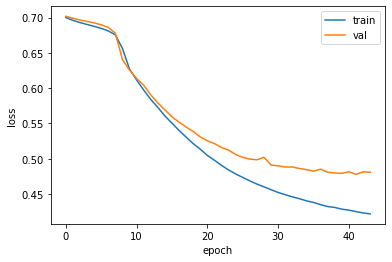

In [13]:
# 손실 시각화 
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


In [14]:
# 모델 성능 확인 
model.evaluate(val_oh, val_target)

157/157 [==============================] - 2s 15ms/step - loss: 0.4780 - accuracy: 0.7758


[0.4779728055000305, 0.7757999897003174]

--- 
### LSTM(Long Short Term Memory) 신경망 모델 구성하기 
- 순환 신경망의 셀로 이전 타입스텝의 샘플을 기억하고 있음 


In [15]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) 
# embedding : One Hot Encoding 
model.add(keras.layers.LSTM(8)) # 8개의 셀을 사용 
model.add(keras.layers.Dense(1, activation='sigmoid')) # 결과 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',      # 이진분류
    metrics='accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    '../Data/best-simpleLSTM-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,   # mini batch경사하강법. 일반 경사하강법은 너무 오래걸림 ( 8 * 8 )
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 13s 34ms/step - loss: 0.6926 - accuracy: 0.5366 - val_loss: 0.6922 - val_accuracy: 0.5376
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6906 - accuracy: 0.5959 - val_loss: 0.6896 - val_accuracy: 0.5932
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6862 - accuracy: 0.6250 - val_loss: 0.6839 - val_accuracy: 0.6236
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6751 - accuracy: 0.6595 - val_loss: 0.6650 - val_accuracy: 0.6608
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6287 - accuracy: 0.7168 - val_loss: 0.6068 - val_accuracy: 0.7194
Epoch 6/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5893 - accuracy: 0.7287 - val_loss: 0.5861 - val_accuracy: 0.7260
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5660 - accuracy: 0.7415 - val_loss: 0.5609 - val_acc

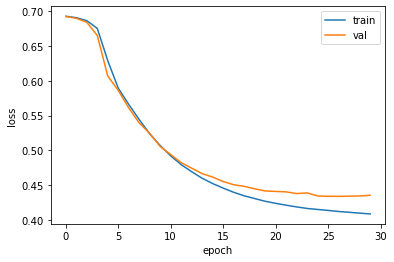

In [18]:
# 손실 시각화 
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


---
# 순환층에 dropout

In [20]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) 
# embedding : One Hot Encoding 
model.add(keras.layers.LSTM(8, dropout=0.3)) # 8개의 셀을 사용 
model.add(keras.layers.Dense(1, activation='sigmoid')) # 결과 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',      # 이진분류
    metrics='accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    '../Data/best-simpleLSTM-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,   # mini batch경사하강법. 일반 경사하강법은 너무 오래걸림 ( 8 * 8 )
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 13s 33ms/step - loss: 0.6926 - accuracy: 0.5261 - val_loss: 0.6921 - val_accuracy: 0.5510
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6911 - accuracy: 0.5752 - val_loss: 0.6901 - val_accuracy: 0.6002
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6876 - accuracy: 0.6240 - val_loss: 0.6855 - val_accuracy: 0.6176
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6777 - accuracy: 0.6418 - val_loss: 0.6670 - val_accuracy: 0.6604
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6303 - accuracy: 0.6970 - val_loss: 0.6029 - val_accuracy: 0.7312
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5885 - accuracy: 0.7332 - val_loss: 0.5783 - val_accuracy: 0.7392
Epoch 7/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5650 - accuracy: 0.7436 - val_loss: 0.5558 - val_ac

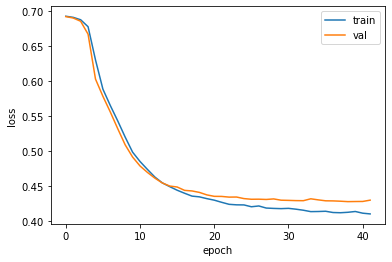

In [22]:
# 손실 시각화 
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

--- 
# 2개 층 연결하기 

In [23]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) 
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # LSTM 2개 쌓을 때 이거 써야  
# 모든 타임스텝의 은닉상태를 출력하려면 return_sequence = True 지정 
model.add(keras.layers.LSTM(8, dropout=0.3)) 
model.add(keras.layers.Dense(1, activation='sigmoid')) # 결과 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',      # 이진분류
    metrics='accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    '../Data/best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,   # mini batch경사하강법. 일반 경사하강법은 너무 오래걸림 ( 8 * 8 )
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 27s 67ms/step - loss: 0.6923 - accuracy: 0.5392 - val_loss: 0.6910 - val_accuracy: 0.5618
Epoch 2/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6830 - accuracy: 0.6291 - val_loss: 0.6654 - val_accuracy: 0.6712
Epoch 3/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6287 - accuracy: 0.6912 - val_loss: 0.6070 - val_accuracy: 0.7020
Epoch 4/100
313/313 [==============================] - 19s 62ms/step - loss: 0.5910 - accuracy: 0.7115 - val_loss: 0.5788 - val_accuracy: 0.7144
Epoch 5/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5655 - accuracy: 0.7316 - val_loss: 0.5509 - val_accuracy: 0.7404
Epoch 6/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5418 - accuracy: 0.7442 - val_loss: 0.5306 - val_accuracy: 0.7506
Epoch 7/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5240 - accuracy: 0.7545 - val_loss: 0.5131 - val_ac

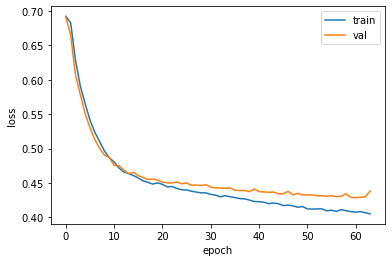

In [25]:
# 손실 시각화 
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
## GRU (Gated Recurrent Unit) 신경망 
- LSTM의 간소화 버전(자동 dropout)
- 기억할걸 정하는    

In [26]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) 
model.add(keras.layers.GRU(8)) 
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',      # 이진분류
    metrics='accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    '../Data/best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,   # mini batch경사하강법. 일반 경사하강법은 너무 오래걸림 ( 8 * 8 )
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 13s 35ms/step - loss: 0.6922 - accuracy: 0.5401 - val_loss: 0.6915 - val_accuracy: 0.5664
Epoch 2/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6901 - accuracy: 0.5882 - val_loss: 0.6893 - val_accuracy: 0.5930
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6870 - accuracy: 0.6060 - val_loss: 0.6858 - val_accuracy: 0.6062
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6822 - accuracy: 0.6147 - val_loss: 0.6806 - val_accuracy: 0.6124
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6752 - accuracy: 0.6240 - val_loss: 0.6730 - val_accuracy: 0.6192
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6651 - accuracy: 0.6332 - val_loss: 0.6620 - val_accuracy: 0.6280
Epoch 7/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6502 - accuracy: 0.6479 - val_loss: 0.6458 - val_ac

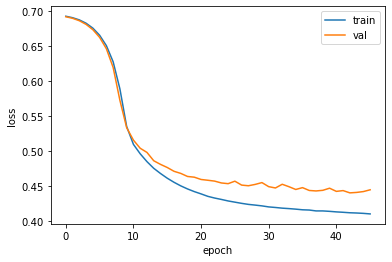

In [28]:
# 손실 시각화 
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()